In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

## Dataset

In [2]:
class_ref = pd.read_csv('dataset/class.csv').loc[:, ['Class_Number', 'Class_Type']]
zoo = pd.read_csv('dataset/zoo.csv').iloc[:, 1:]
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [41]:
class_ref

,Class_Number,Class_Type
0,1,Mammal
1,2,Bird
2,3,Reptile
3,4,Fish
4,5,Amphibian
5,6,Bug
6,7,Invertebrate


#### Setting the dependent and independent variables

In [5]:
zoo_X = zoo.drop('class_type', axis=1)
zoo_y = zoo.loc[:, 'class_type']

## Splitting to train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(zoo_X, zoo_y, test_size=0.2)

## Initialize Logistic Regression model

In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
predicted_val = logistic_model.predict(X_test)

In [13]:
X_test.reset_index(drop=True, inplace=True)

***predicted_data contains the combined X_test and predicted animal class***

In [29]:
predicted_data = pd.concat([X_test, pd.Series(predicted_val, name='predicted')], axis=1)

***replace the class number with the class type***

In [32]:
predicted_data['predicted'].replace(class_ref.to_dict()['Class_Type'], inplace=True)

In [47]:
predicted_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,predicted
0,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,Bird
1,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,Reptile
2,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,Reptile
3,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,Reptile
4,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,Reptile
5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Bird
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,Bird
7,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,Reptile
8,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Reptile
9,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Amphibian


## Bar chart

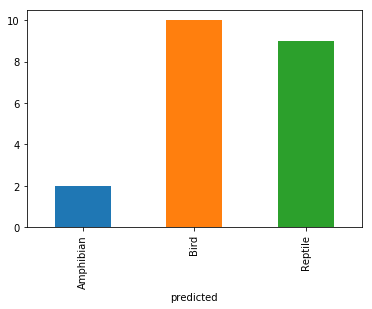

In [82]:
predicted_data.pivot_table(index='predicted', aggfunc='count')['airborne'].plot(kind='bar')

## Accuracy

In [10]:
logistic_model.score(X_test, y_test)

0.9047619047619048